<a href="https://colab.research.google.com/github/ljm524/esaa24-1/blob/main/esaa_hw0325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리]

## CHAPTER 12 시계열 데이터

### 12-1 datetime 오브젝트


*   datetime 오브젝트로 변환하기 - to_datetime 메서드 : to_datetime(a,format='%d/%m/%y)
*   시간 형식 지정자 : a.strftime('%Y-%m-%d %H:%M:%S')->날짜 시간 출력
*   datetime 오브젝트로 변환하기 - read_csv 메서드 : pd.read_csv(a,parse_dates=['b'])
*   datetime 오브젝트에서 날짜 정보 추출하기 : datetime오브젝트[0].year/month/day->년/월/일을 각각 추출 가능
*   dt 접근자 사용하기 : a['b'].dt.c->a자료의 b열에서 c(year,month,day)를 추출함. 정수형으로 나옴(int).




### 12-2 사례별 시계열 데이터 계산하기


*   datetime 오브젝트와 인덱스 - DatetimeIndex
*   시간 간격과 인덱스 - TimedeltaIndex
*   시간 범위와 인덱스
*   시간 범위 수정하고 데이터 밀어내기 - shift 메서드



# [필사]

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

2024-03-27 12:08:45.061329


In [3]:
now2 = datetime.today()
print(now2)

2024-03-27 12:08:45.075891


In [4]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2024-03-27 12:08:45.086769
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
diff1 = t1-t2
print(diff1)
print(type(diff1))

19809 days, 12:08:45.086769
<class 'datetime.timedelta'>


In [6]:
diff2 = t2-t1
print(diff2)
print(type(diff2))

-19810 days, 11:51:14.913231
<class 'datetime.timedelta'>


In [7]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/country_timeseries.csv')

Mounted at /content/drive


In [8]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [9]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [10]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [11]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


In [12]:
now = datetime.now()
print(now)

2024-03-27 12:09:12.197499


In [13]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2024-03-27


In [14]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

12:09:12


In [15]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2024-03-27 12:09:12


In [16]:
ebola1 = pd.read_csv('/content/drive/MyDrive/ESAA/country_timeseries.csv', parse_dates=["Date"])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [17]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [18]:
print(d1[0].year)

2018


In [19]:
print(d1[0].month)

5


In [20]:
print(d1[0].day)

16


In [21]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [22]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [23]:
print(ebola['date_dt'][3].year)

2015


In [24]:
print(ebola['date_dt'][3].month)

1


In [25]:
print(ebola['date_dt'][3].day)

2


In [26]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']])

           Date    date_dt
0      1/5/2015 2015-01-05
1      1/4/2015 2015-01-04
2      1/3/2015 2015-01-03
3      1/2/2015 2015-01-02
4    12/31/2014 2014-12-31
..          ...        ...
117   3/27/2014 2014-03-27
118   3/26/2014 2014-03-26
119   3/25/2014 2014-03-25
120   3/24/2014 2014-03-24
121   3/22/2014 2014-03-22

[122 rows x 2 columns]


In [27]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [28]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)

print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [29]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [30]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [31]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [32]:
from google.colab import drive
drive.mount('/content/drive')
banks = pd.read_csv('/content/drive/MyDrive/ESAA/banklist.csv')
print(banks.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328            

In [33]:
banks_no_dates = pd.read_csv('/content/drive/MyDrive/ESAA/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [34]:
banks = pd.read_csv('/content/drive/MyDrive/ESAA/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [35]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
2  58302                         Whitney Bank   2017-04-28   2017-07-26   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quarter  closing_year  
0                2          2017 

In [36]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [37]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

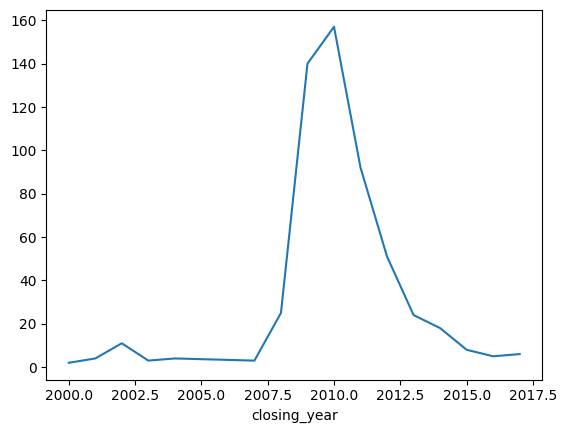

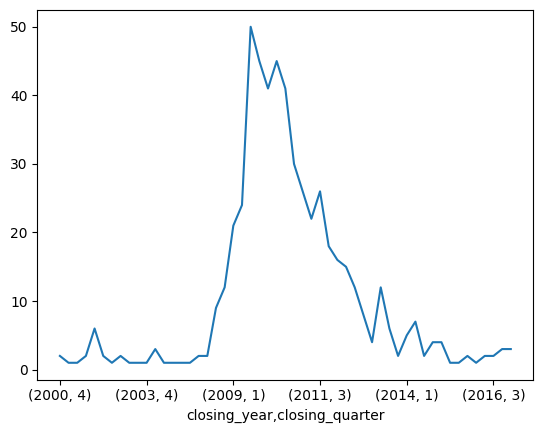

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [39]:
pip install pandas-datareader

In [40]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pdr.get_data_quandl('TSLA', api_key = 'cfKLDar6s8V71GyUw5Xz')

from google.colab import drive
drive.mount('/content/drive')
tesla.to_csv('/content/drive/MyDrive/tesla_stock_quandl.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
tesla.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,


In [42]:
tesla = pd.read_csv('/content/drive/MyDrive/ESAA/tesla_stock_yahoo.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1791 non-null   datetime64[ns]
 1   Open       1791 non-null   float64       
 2   High       1791 non-null   float64       
 3   Low        1791 non-null   float64       
 4   Close      1791 non-null   float64       
 5   Adj Close  1791 non-null   float64       
 6   Volume     1791 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 98.1 KB
None


In [43]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month ==6)])

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


In [44]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)


In [45]:
print(tesla['2015'].iloc[:5, :5])

                 Date        Open        High         Low       Close
Date                                                                 
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995


<ipython-input-45-846783a4896c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5, :5])


In [46]:
print(tesla['2010-06'].iloc[:, :5])

                 Date       Open   High        Low      Close
Date                                                         
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000


<ipython-input-46-01bd23607ac5>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:, :5])


In [47]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date       Open   High        Low      Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   
2010-07-01 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   
2010-07-02 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   
2010-07-06 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   

              Volume ref_date  
Date                           
2010-06-29  18766300   0 days  
2010-06-30  17187100   1 days  
2010-07-01   8218800   2 days  
2010-07-02   5139800   3 days  
2010-07-06   6866900   7 days  


In [48]:
tesla.index =tesla['ref_date']
print(tesla.iloc[:5, :5])

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001
7 days   2010-07-06  20.000000  20.00  15.830000  16.110001


In [49]:
print(tesla['5 days':].iloc[:5, :5])

               Date       Open       High        Low      Close
ref_date                                                       
7 days   2010-07-06  20.000000  20.000000  15.830000  16.110001
8 days   2010-07-07  16.400000  16.629999  14.980000  15.800000
9 days   2010-07-08  16.139999  17.520000  15.570000  17.459999
10 days  2010-07-09  17.580000  17.900000  16.549999  17.400000
13 days  2010-07-12  17.950001  18.070000  17.000000  17.049999


In [50]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/country_timeseries.csv')
print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [51]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [52]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [53]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                  Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                       
1/5/2015      1/5/2015  289        2776.0            NaN            10030.0
1/4/2015      1/4/2015  288        2775.0            NaN             9780.0
1/3/2015      1/3/2015  287        2769.0         8166.0             9722.0
1/2/2015      1/2/2015  286           NaN         8157.0                NaN
12/31/2014  12/31/2014  284        2730.0         8115.0             9633.0


In [54]:
print(pd.date_range('2017-01-01','2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


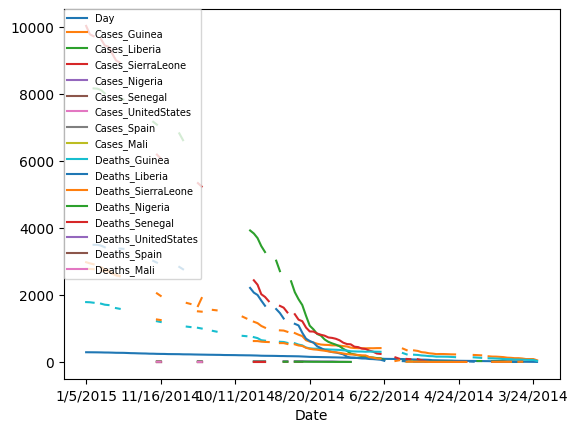

In [55]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [56]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


In [57]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/country_timeseries.csv', parse_dates=['Date'])

print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [58]:
print(ebola.tail().iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [59]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())

In [60]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [61]:
new_idx = reversed(new_idx)

In [62]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [63]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [64]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [65]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [66]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [67]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [68]:
ebola_shift = pd.DataFrame(ebola_dict)

In [69]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [70]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

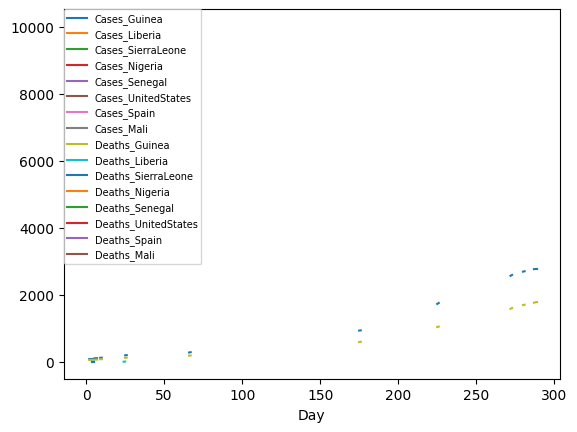

In [71]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()